In [114]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
with open("classifiers.pkl", "rb") as f:
    dump = pickle.load(f)
classifiers = dump["classifiers"]

In [116]:
classifier_scores = {k: cl.scores_[1].max(axis=1) for k, cl in classifiers.items()}
classifier_scores = pd.DataFrame(classifier_scores).T.reset_index() \
    .rename(columns={"level_0": "layer", "level_1": "feature"}) \
    .melt(id_vars=["layer", "feature"], var_name="fold", value_name="score")

<Axes: xlabel='layer', ylabel='score'>

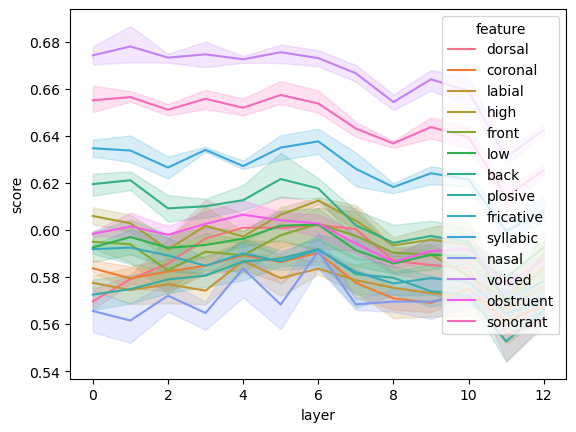

In [117]:
sns.lineplot(data=classifier_scores, x="layer", y="score", hue="feature")

---

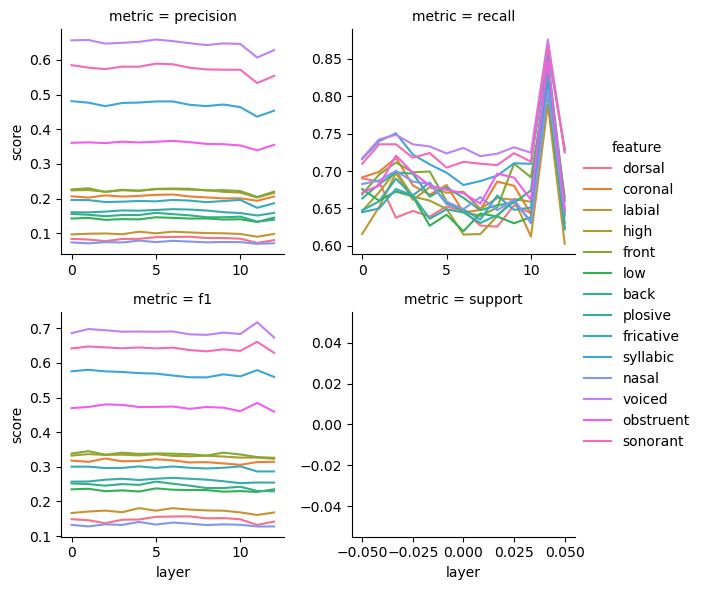

In [118]:
scores_df = pd.DataFrame(dump["scores"], index=["precision", "recall", "f1", "support"]).T \
    .reset_index().rename(columns={"level_0": "layer", "level_1": "feature"})

g = sns.FacetGrid(data=scores_df.melt(id_vars=["layer", "feature"], var_name="metric", value_name="score"),
                  col="metric", hue="feature", col_wrap=2, sharey=False, sharex=False)
g.map(sns.lineplot, "layer", "score")
g.add_legend()